# Numpy Broadcasting

To understand Broadcasting in Numpy one has to understand the dimension and shape of an array thoroughly.

In [1]:
import numpy as np 
a = np.array([1,2,3]) 
print(a) # [1 2 3] 
print(a.ndim) # 1 
print(a.shape) # (3,) 
print(a.size) # 3

[1 2 3]
1
(3,)
3


In [2]:
b = np.array([[1,2,3],[4,5,6]]) 
print(b) # [[1 2 3] [4 5 6]] 
print(b.ndim) # 2 , 2-axis(row and column) 
print(b.shape) # (2, 3) 2 rows and 3 columns 
print(b.size) # 6 number of elements

[[1 2 3]
 [4 5 6]]
2
(2, 3)
6


In [3]:
c = np.array([[[1,2,3],[4,5,6],[7,8,9]]]) 
print(c) # [[[1 2 3] [4 5 6] [7 8 9]]] 
print(c.ndim) # 3 
print(c.shape) # (1, 3, 3) 
print(c.size) # 9

[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
3
(1, 3, 3)
9


In [4]:
d = np.array([[1],[2]]) 
print(d) # [[1] [2]] 
print(d.ndim) # 2 
print(d.shape) # (2, 1) 
print(d.size) # 2

[[1]
 [2]]
2
(2, 1)
2


In [5]:
s = np.asscalar(np.array([5])) 
print(s) # 5

5


Note:- Scalars does not have dimension, shape and size. In this case it is an int object. The dimension of the array can be know by the number of square brackets used while creating the array(1d array 1pair of [ ] brackets,2d array [ [ ] ] brackets ). Let's start learning Broadcasting with this understanding.

# Case 1:-

In [6]:
a = np.array([1,2,3])
b = np.array([5,6,7]) 
print(a+b) # [ 6 8 10]

[ 6  8 10]


This is a start forward case.
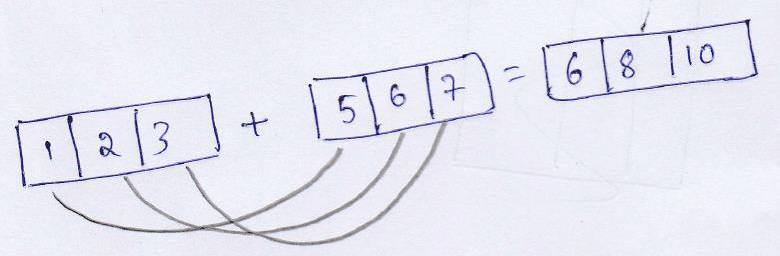

# Case 2:- 

In [7]:
a = np.array([1,2,3])
print(a+5) # [6 7 8]

[6 7 8]


What has happened is this case?
shape of a is (3,) But 5 does not have shape it is just an int object now in order to perform addition the shape as to be same.Numpy converts 5 to one dimension.i,e [5]

In [8]:
v = np.array([5]) 
print(v.shape) # (1,)

(1,)


Now the dimension is same but the shape is different. Numpy internally changes it to same shape as show in below figure.
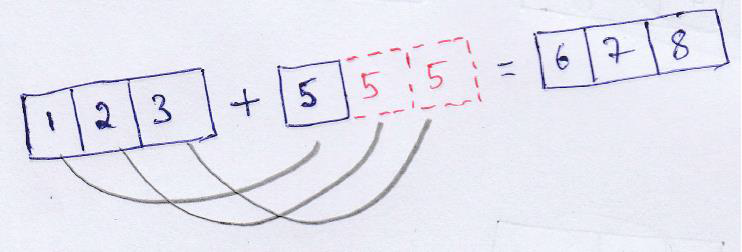
Things get much clear in later section of the material.

# Case 3:-

In [9]:
 
a = np.array([[1,2,3],[4,5,6],[7,8,9]]) 
print(a) #[[1 2 3] [4 5 6] [7 8 9]] 
b= np.array([1,2,3]) 
print(b) #[1 2 3] 
print(a + b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


In [10]:
print(a.shape) # (3,3) 
print(b.shape) # (3,) 
print(a.ndim) # 2 
print(b.ndim) # 1

(3, 3)
(3,)
2
1


Array with lower dimension(array b), its dimension is changed to match the array with higher dimension(array a), by padding one to the left of the lower dimension array(array b). (3, ) is changed to (1,3) now the dimensions are same but the sizes are different. Now numpy changes the shape to match with each other. By changing 1's to the shape of the other array. 1 is changed to 3 so that it matches the shape of array a (3,3) now dimension is same and shape is same addition is performed

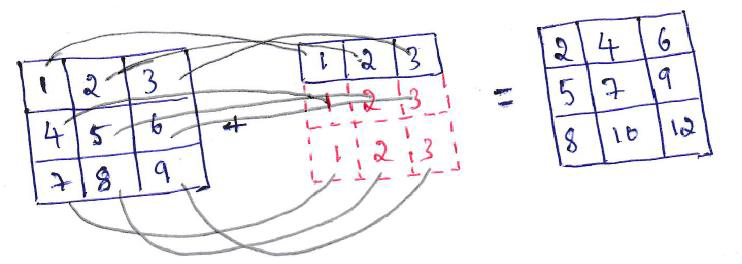

To check how the arrays are broadcasted.

In [11]:
a_broad, b_broad = np.broadcast_arrays(a , b) 
print(a_broad) #[[1 2 3] [4 5 6] [7 8 9]] 
print(b_broad) #[[1 2 3] [1 2 3] [1 2 3]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]


still the shape of the array b is

In [12]:
print(b.shape) #(3,)

(3,)


# Case 4:- 

In [13]:
a= np.array([[1],[2],[3]]) 
b = np.array([1,2,3]) 
print(a)# [[1] [2] [3]]
print(b)# [1 2 3]
print(a + b) 
print(a.shape) # (3, 1) 
print(b.shape) # (3,)
print(a.ndim) # 2 print(b.ndim) # 1

[[1]
 [2]
 [3]]
[1 2 3]
[[2 3 4]
 [3 4 5]
 [4 5 6]]
(3, 1)
(3,)
2


Step 1/Rule 1:- 

Array with lower dimension(array b), its dimension is changed to match the array with higher dimension(array a), by padding one to the left of the lower dimension array(array b). (3, ) is changed to (1,3) now the dimensions are same but the shapes are different.

Step 2/Rule 2:- 

Array a has shape of size (3,1) and array b has shape (1,3) Numpy changes the shape to match with each other. By changing 1's to the shape of the other array Array a shape (3,1) is changed to (3,3) and array b is changed from shape (1,3) to (3,3).Shapes are same and addition is performed as show in figure.

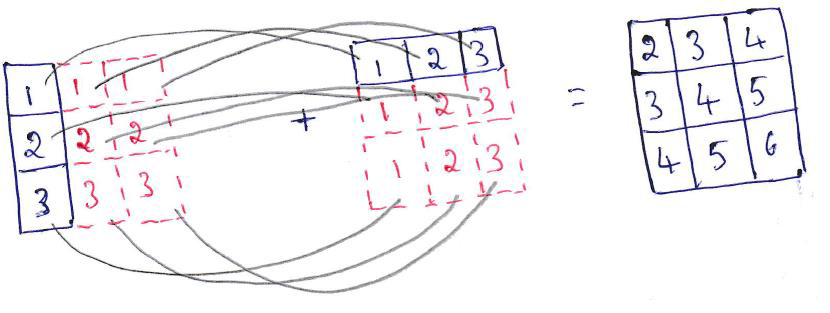

To check how the arrays are broadcasted.

In [14]:
a_broad, b_broad = np.broadcast_arrays(a , b) 
print(a_broad) 
print(b_broad) 

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]


Shapes and dimensions of array a and array b remain same this things are done logically but not actually changed.

In [15]:
print(a.shape) # (3, 1) 
print(b.shape) # (3,) 
print(a.ndim) # 2 
print(b.ndim) # 1

(3, 1)
(3,)
2
1


# Case 5:-

In [16]:
a= np.array([[1,2,3],[4,5,6]]) 
b = np.array([1,2]) 
print(a+b)

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

Why Error?

In [17]:
print(a.shape) # (2, 3) 
print(b.shape) # (2,) 
print(a.ndim) # 2 
print(b.ndim) # 1

(2, 3)
(2,)
2
1


Step 1/Rule 1:- 

Array with lower dimension(array b), its dimension is changed to match the array with higher dimension(array a), by padding one to the left of the lower dimension array(array b). (2, ) is changed to (1,2) now the dimensions are same but the sizes are different. 

Step 2/Rule 2:-

Fails because shape of a is (2,3) and changed shape of b is (1,2)if 1 is changed to 2, (2,3) but the second dimension 3 does not match with 2. np.newaxis:- Internally numpy changes the dimension by adding np.newaxis egs:-

In [18]:
a= np.array([[1,2,3],[4,5,6]]) 
b = np.array([1,2,3]) 
print(a.shape) # (2, 3) 
print(b.shape) # (3,) 
print(a.ndim) # 2 
print(b.ndim) # 1 
print(a + b[np.newaxis,:])

(2, 3)
(3,)
2
1
[[2 4 6]
 [5 7 9]]


but

In [19]:
print(a+ b[:,np.newaxis])

ValueError: operands could not be broadcast together with shapes (2,3) (3,1) 

I think you can reason why? Same way it works for any dimensions.